## Political Polarization Visualization Project

#### This project centers on looking a political data and developing a measure of partisanship tilt and dealing with missing values. We want to look at partisanship tilt on both issues and members of congress.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

house = pd.read_csv("~/share/Datasets/HouseVotes84.csv")
house.head()

,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,R,0,1,0,1,1,1,0,0,0,1,2,1,1,1,0,1
1,R,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,2
2,D,2,1,1,2,1,1,0,0,0,0,1,0,1,1,0,0
3,D,0,1,1,0,2,1,0,0,0,0,1,0,1,0,0,1
4,D,1,1,1,0,1,1,0,0,0,0,1,2,1,1,1,1


In [31]:
house2 = house.replace(0, -1)
house2 = house2.replace(2, 0)
house2.head()

,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,R,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,R,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,D,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,D,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,D,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [32]:
Republican = house2[house2["Party"] == "R"] #Separating the two political parties
Democrat = house2[house2["Party"] == "D"] 

In [33]:
Republican = Republican.drop("Party", axis = 1) #Dropping the Party column
Republican.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
7,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,0,1
8,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1
10,-1,1,-1,1,1,-1,-1,-1,-1,-1,0,0,1,1,-1,-1


In [34]:
Democrat = Democrat.drop("Party", axis = 1)#Dropping the Party column
Democrat.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
5,-1,1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1
6,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,0,1,1,1


In [35]:
dem = Democrat.sum()/Democrat.abs().sum() #Calculating partisanship tilt for each issue
rep = Republican.sum()/Republican.abs().sum()

### 1. Partisanship Barplot

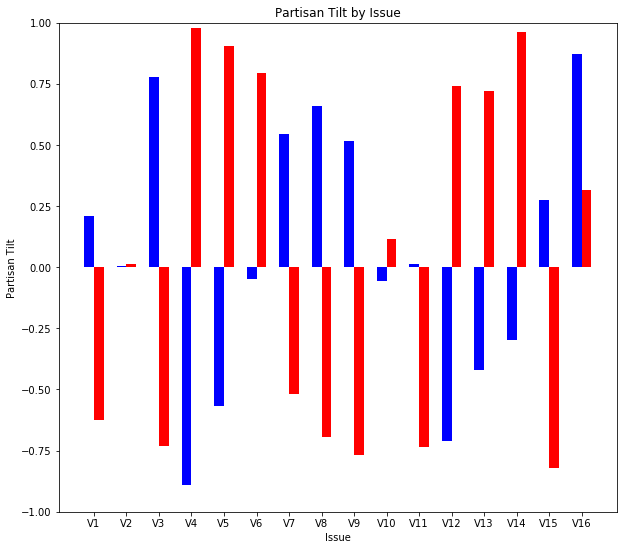

In [36]:
fig, ax = plt.subplots(figsize=(10,9))
ax.bar(x = (np.arange(dem.shape[0])-0.15),width =0.30, height=dem, color="blue")
ax.bar(x = (np.arange(rep.shape[0])+0.15),width =0.30, height=rep, color="red")
ax.set_ylim(-1,1) #-1 for republican heavy issue and 1 for democrat heavy issue
ax.set_xticks(np.arange(dem.shape[0]))
ax.set_xticklabels(house.columns[1:]) #To label the xticks according to column names
ax.set_ylabel("Partisan Tilt")
ax.set_xlabel("Issue")
ax.set_title("Partisan Tilt by Issue")
plt.show()

In [37]:
dem = Democrat.sum()/Democrat.abs().sum()

In [38]:
rep = Republican.sum()/Republican.abs().sum()

In [39]:
#Calculating partisanship tilt for each congressman
dem_partisonship =(Democrat*dem).sum(axis=1)/(Democrat*dem).abs().sum(axis=1)
rep_partisonship =(Republican*rep).sum(axis=1)/(Republican*rep).abs().sum(axis=1)

### 2. Partisanship Scatterplot

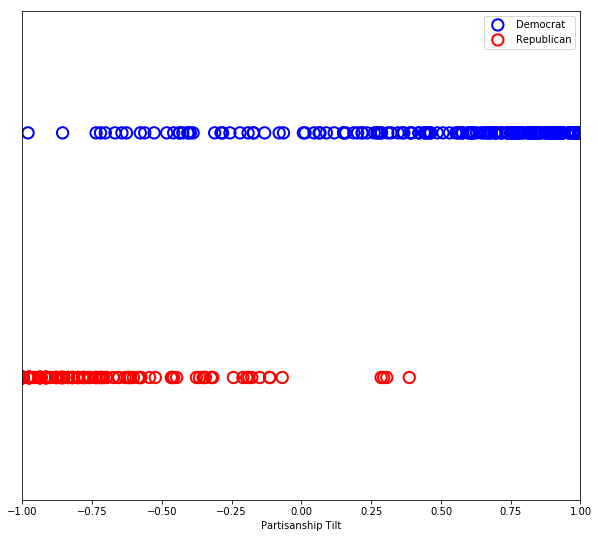

In [40]:
fig, ax = plt.subplots(figsize=(10,9))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_yticks([])
ax.scatter(dem_partisonship, (np.zeros(dem_partisonship.shape[0])+0.5),s=128,facecolors='none',edgecolors='blue', linewidths=2,label="Democrat")
ax.scatter(rep_partisonship*-1, (np.zeros(rep_partisonship.shape[0])-0.5),s=128,facecolors='none',edgecolors='red', linewidths=2,label="Republican")
ax.set_xlabel("Partisanship Tilt")
ax.legend()
plt.show()